In [1]:
import praw
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [2]:
#Connect to reddit API
reddit = praw.Reddit(
    client_id="*****",
    client_secret="******",
    user_agent="sentiment",
)

In [3]:
#Focus on r/wallstreetbets
subreddit = reddit.subreddit('wallstreetbets')

In [15]:
#Create an array of words used in the title as well as the text posted. Focus on "hot" posts

wordsc=[]
substop= reddit.subreddit('wallstreetbets').hot()
for sub in substop:
    text=sub.selftext
    text_wds=text.split()
    wordsc.append(text_wds)

wordsct=[]
substop= reddit.subreddit('wallstreetbets').hot()
for sub in substop:
    title=sub.title
    title_wds=title.split()
    wordsct.append(title_wds)
    
wordsc=wordsct+wordsc


In [5]:
#Build a list of words from the array.
newwordsc = []
for i in wordsc:
    for j in i:
        newwordsc.append(j)

#Extract tickers
stock_symbol=[]
for word in newwordsc:
    if word[0]=='$':
        stock_symbol.append(word)

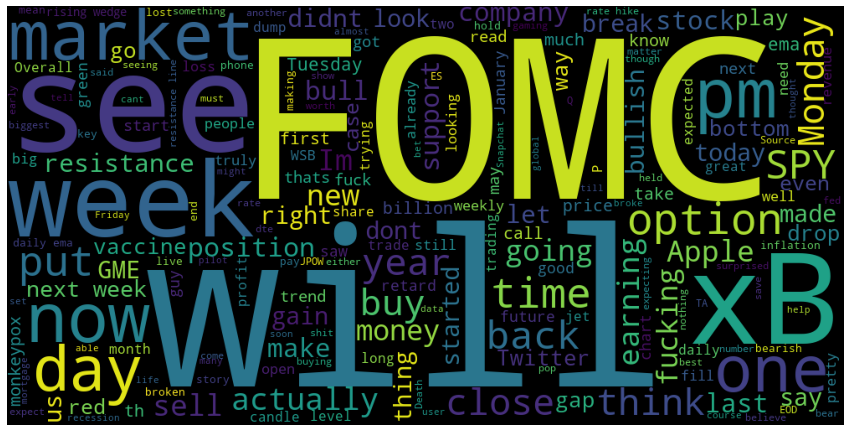

In [6]:
#Remove non-alphabetic characters and empty strings.
cloud1=[]
for i in newwordsc:
    i=''.join(filter(str.isalpha, i))
    cloud1.append(i)

while("" in cloud1) :
    cloud1.remove("")
    
#Build the word cloud.
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(cloud1))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [13]:
#Extract the ticker discussed.
stocksymbol = [x for x in stock_symbol if not any(x1.isdigit() for x1 in x)]

#Select uppercase words.
stockfinal=[]
for symbol in stocksymbol:
    if symbol.isupper():
        stockfinal.append(symbol)

#Remove cashtag and other non-alphabetic characters.
stocks=[]
for i in stockfinal:
    i=''.join(filter(str.isalpha, i))
    stocks.append(i)

#Remove duplicates.
res = []
for i in stocks:
    if i not in res:
        res.append(i)


In [14]:
#Final list 
res

['GME', 'TSLA', 'BAVA', 'BVNRY', 'TWTR', 'CUM', 'MMMAPT', 'KMB']